<img>
<html>
  <head>
  </head>

  <body>
    <img src="image/12.jpg">
  </body>
</html>

<a id="library"></a>
<div style="background-color:#3C0753; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;"></span> Intro of the Data
    </h2>
</div>


# PJM Hourly Energy Consumption Data

## About the Dataset  
**PJM Interconnection LLC (PJM)** is a **regional transmission organization (RTO)** in the **United States**. It operates as part of the **Eastern Interconnection grid**, managing an **electric transmission system** serving multiple states and regions.  

## Covered Regions  
The dataset includes data from the following states and districts:  

- Delaware  
- Illinois  
- Indiana  
- Kentucky  
- Maryland  
- Michigan  
- New Jersey  
- North Carolina  
- Ohio  
- Pennsylvania  
- Tennessee  
- Virginia  
- West Virginia  
- District of Columbia  

## Data Description  
- The dataset contains **hourly power consumption data** collected from PJMâ€™s official website.  
- All values are measured in **megawatts (MW)**.  
- **Important:** The regions have changed over the years, so **data availability may vary** by date and location.  

---

- **About the author:** Sajjad Ali Shah
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)
- **Dataset link:** [Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption/data)

---

<a id="library"></a>
<div style="background-color:#3C0753; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;"></span> Import Library
    </h2>
</div>


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load all CSV files
data_files = {
    'AEP': './Data/AEP_hourly.csv',
    'COMED': './Data/COMED_hourly.csv',
    'DAYTON': './Data/DAYTON_hourly.csv',
    'DEOK': './Data/DEOK_hourly.csv',
    'DOM': './Data/DOM_hourly.csv',
    'DUQ': './Data/DUQ_hourly.csv',
    'EKPC': './Data/EKPC_hourly.csv',
    'FE': './Data/FE_hourly.csv',
    'NI': './Data/NI_hourly.csv',
    'PJME': './Data/PJME_hourly.csv',
    'PJMW': './Data/PJMW_hourly.csv',
    'pjm_est': './Data/pjm_hourly_est.csv',
    'PJM_Load': './Data/PJM_Load_hourly.csv'
}

In [3]:
# Dictionary to store DataFrames
data = {}
for region, file in data_files.items():
    data[region] = pd.read_csv(file, index_col=[0], parse_dates=[0])

In [7]:
for region, df in data.items():
    stats = df.describe()
    print(f"{region} Stats:\n{stats}\n")

AEP Stats:
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000

COMED Stats:
           COMED_MW
count  66497.000000
mean   11420.152112
std     2304.139517
min     7237.000000
25%     9780.000000
50%    11152.000000
75%    12510.000000
max    23753.000000

DAYTON Stats:
           DAYTON_MW
count  121275.000000
mean     2037.851140
std       393.403153
min       982.000000
25%      1749.000000
50%      2009.000000
75%      2279.000000
max      3746.000000

DEOK Stats:
            DEOK_MW
count  57739.000000
mean    3105.096486
std      599.859026
min      907.000000
25%     2687.000000
50%     3013.000000
75%     3449.000000
max     5445.000000

DOM Stats:
              DOM_MW
count  116189.000000
mean    10949.203625
std      2413.946569
min      1253.000000
25%      9322.000000
50%     10501.000000
75%     12378.000000
max     21651.000000

DUQ Sta

In [8]:
# Feature Engineering
for region, df in data.items():
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day
    df['Hour'] = df.index.hour
    df['DayOfWeek'] = df.index.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
    df['Quarter'] = df['Month'] % 4 + 1
    df['Season'] = np.where(df['Month'].isin([12, 1, 2]), 'Winter',
                          np.where(df['Month'].isin([3, 4, 5]), 'Spring',
                                 np.where(df['Month'].isin([6, 7, 8]), 'Summer', 'Fall')))

In [9]:
# Combine data for correlation analysis (focus on key regions)
combined = pd.concat(
    [df.loc[~df.index.duplicated(), f'{region}_MW'].rename(region) for region, df in data.items() if f'{region}_MW' in df.columns and region in ['PJME', 'PJM_Load', 'AEP', 'DOM']],
    axis=1,
    join='outer'
)

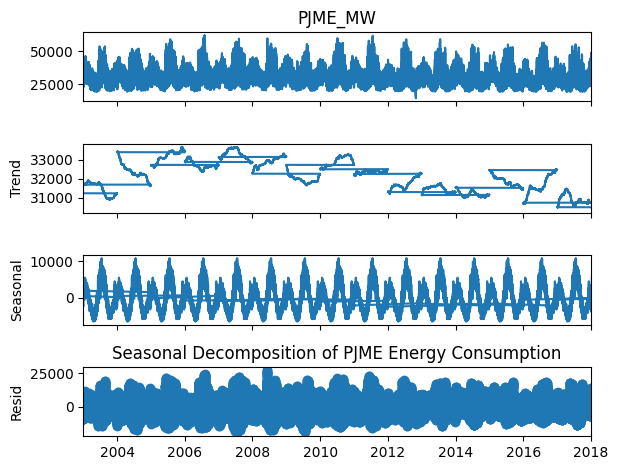

In [10]:
# Time Series Decomposition for PJME
decomposition = seasonal_decompose(data['PJME']['PJME_MW'].dropna(), period=24*365)
decomposition.plot()
plt.title('Seasonal Decomposition of PJME Energy Consumption')
plt.tight_layout()
plt.show()

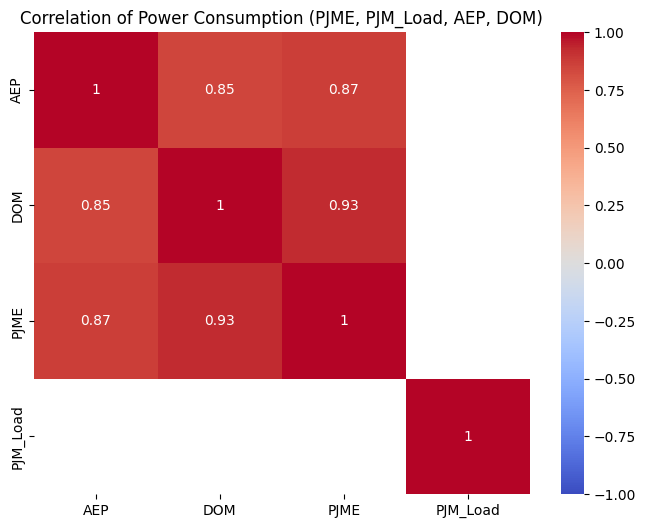

In [11]:
# Correlation Heatmap
correlation = combined.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Power Consumption (PJME, PJM_Load, AEP, DOM)')
plt.show()

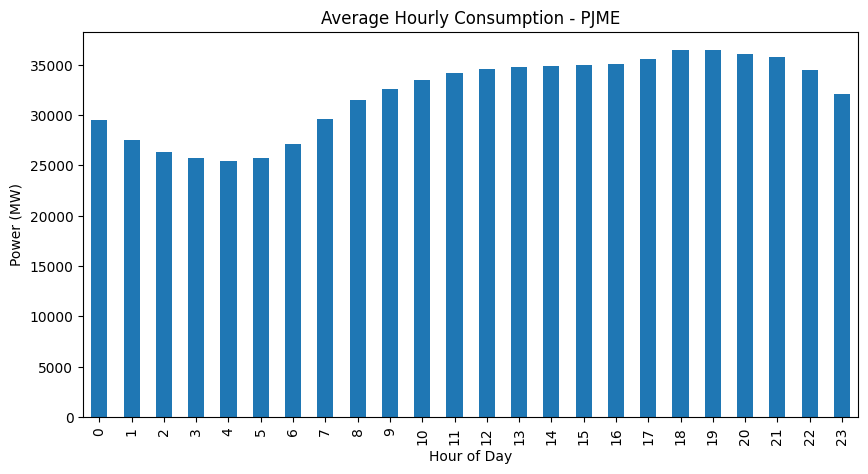

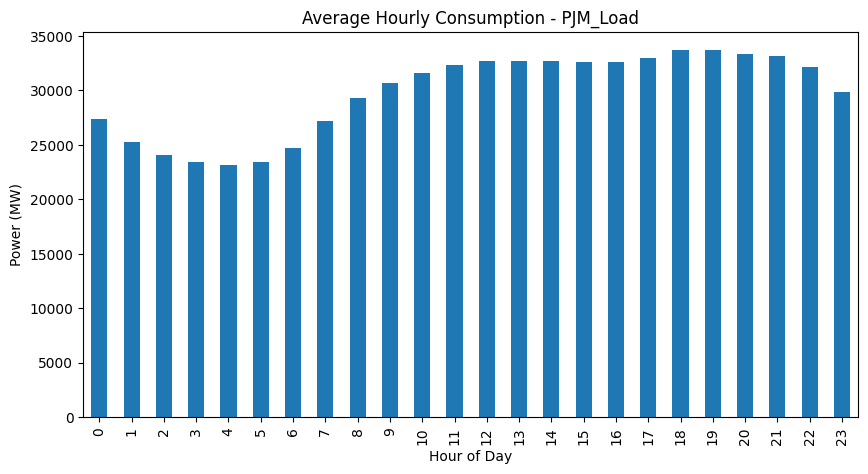

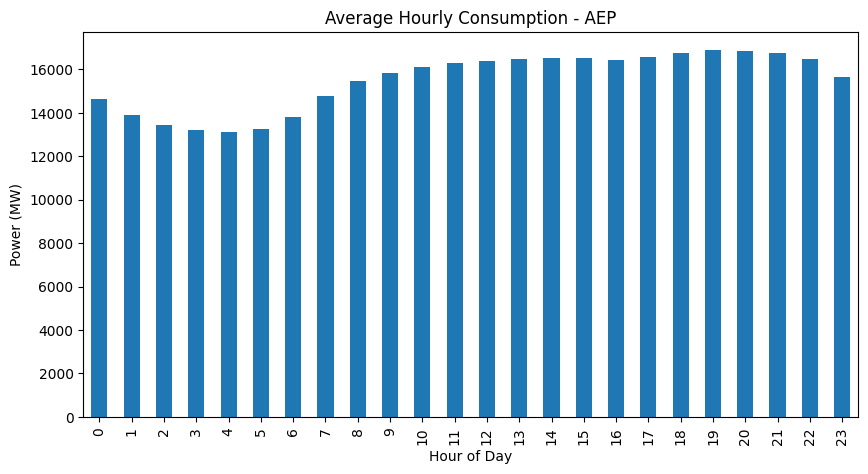

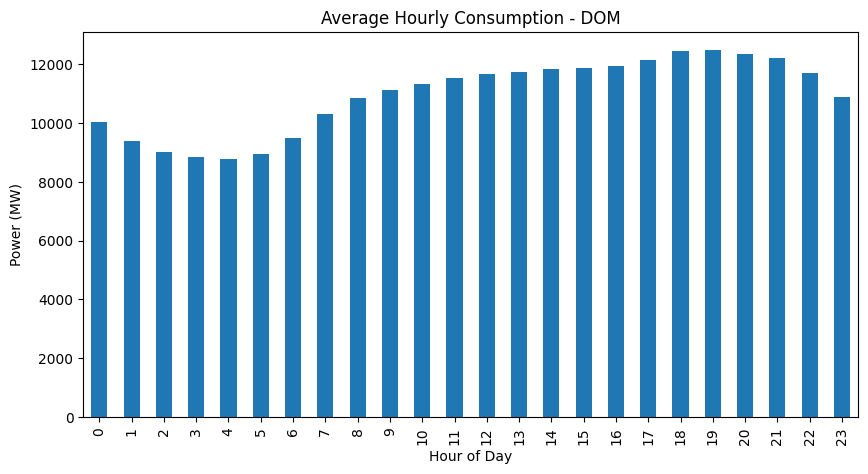

In [12]:
# Peak Hour Analysis for key regions
for region in ['PJME', 'PJM_Load', 'AEP', 'DOM']:
    if f'{region}_MW' in data[region].columns:
        peak_hour = data[region].groupby('Hour')[f'{region}_MW'].mean()
        plt.figure(figsize=(10, 5))
        peak_hour.plot(kind='bar')
        plt.title(f'Average Hourly Consumption - {region}')
        plt.xlabel('Hour of Day')
        plt.ylabel('Power (MW)')
        plt.show()

d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

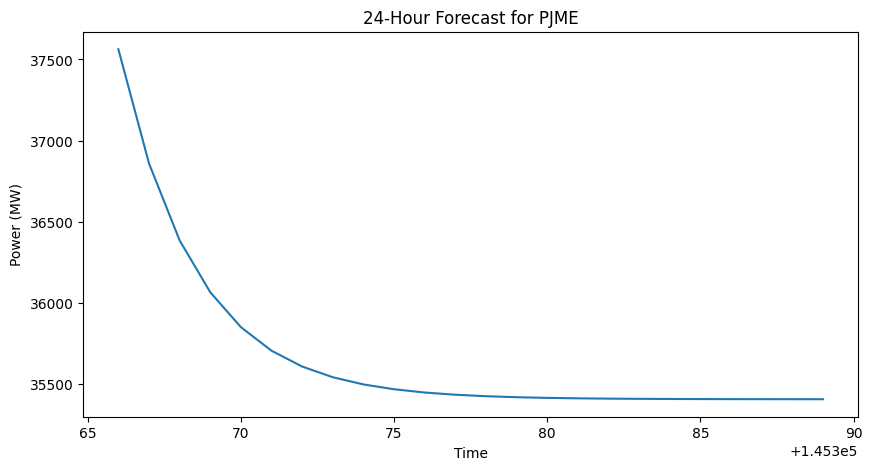

In [13]:
# ARIMA Forecasting for PJME
model = ARIMA(data['PJME']['PJME_MW'].dropna(), order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=24)
plt.figure(figsize=(10, 5))
plt.plot(forecast)
plt.title('24-Hour Forecast for PJME')
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.show()


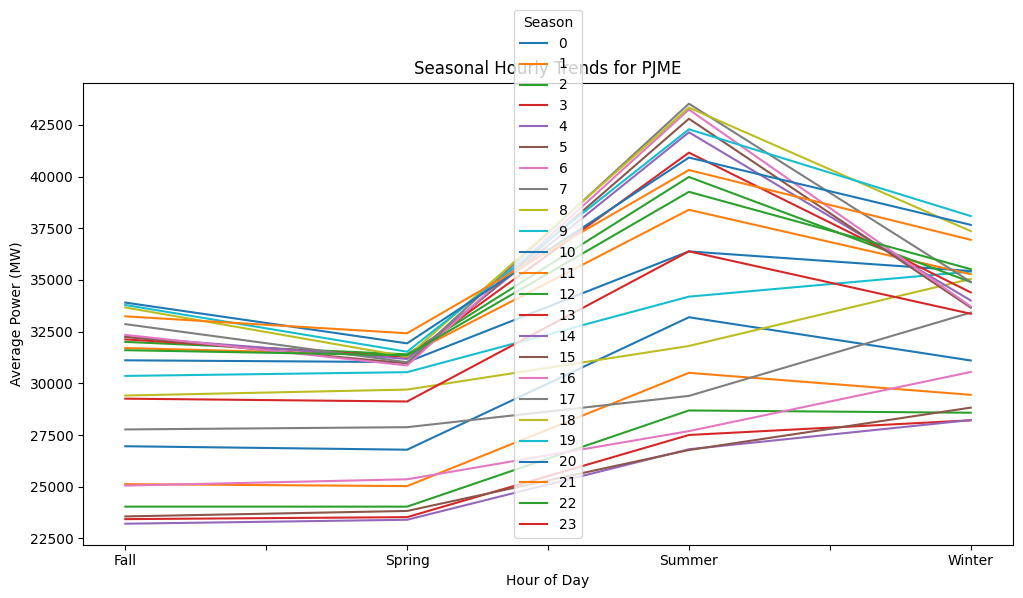

In [14]:

# Seasonal Trend Analysis for PJME
seasonal_trends = data['PJME'].groupby(['Season', 'Hour'])['PJME_MW'].mean().unstack()
plt.figure(figsize=(12, 6))
seasonal_trends.plot(ax=plt.gca())
plt.title('Seasonal Hourly Trends for PJME')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (MW)')
plt.legend(title='Season')
plt.show()